# Emukit Bayesian Optimization Benchmark

This notebook uses the `emukit.benchmarking` package to compare two Bayesian optimization methods against each other, using the Branin test function.

In [1]:
import emukit
import numpy as np

## Set up test function

We use the Branin function which is already included in Emukit, both the function and the appropriate input domain are ready made for us.

In [2]:
from emukit.test_functions.branin import branin_function
branin_fcn, parameter_space = branin_function()

## Set up methods to test

We compare Bayesian optimization using different models. All the methods collect points one at a time in a sequential fashion and use the expected improvement acquisition function. The models we test are:
- A Gaussian process with Matern52 covariance function
- Random forest using the pyrfr package

We choose to create lambda functions with a consistent interface that return an instance of a loop with a given initial data set.

In [3]:
from emukit.examples.gp_bayesian_optimization.enums import ModelType, AcquisitionType
from emukit.examples.gp_bayesian_optimization.optimization_loops import create_bayesian_optimization_loop
from emukit.examples.gp_bayesian_optimization.single_objective_bayesian_optimization import GPBayesianOptimization

loops = [
    ('Random Forest', lambda loop_state: create_bayesian_optimization_loop(loop_state.X, loop_state.Y, parameter_space, AcquisitionType.EI, 
                                                                     ModelType.RandomForest)),
    ('Gaussian Process', lambda loop_state: GPBayesianOptimization(parameter_space.parameters, loop_state.X, loop_state.Y, 
                                                             acquisition_type=AcquisitionType.EI, noiseless=True))
]

# Run benchmark

A total of 10 initial data sets are generated of 5 observations that are randomly sampled from the input domain. For every intial data set, each method is run for 30 optimization iterations. The Gaussian process model has its hyper-parameters optimized after each function observation whereas the other models have fixed hyper-parameters.

In [7]:
from emukit.benchmarking.loop_benchmarking.benchmarker import Benchmarker
from emukit.benchmarking.loop_benchmarking.metrics import MinimumObservedValueMetric, TimeMetric
n_repeats = 10
n_initial_data = 5
n_iterations = 20

metrics = [MinimumObservedValueMetric(), TimeMetric()]

benchmarkers = Benchmarker(loops, branin_fcn, parameter_space, metrics=metrics)
benchmark_results = benchmarkers.run_benchmark(n_iterations=n_iterations, n_initial_data=n_initial_data, 
                                               n_repeats=n_repeats)

Optimization restart 1/1, f = 21.763249492052537
Optimization restart 1/1, f = 26.504729612407633
Optimization restart 1/1, f = 34.45715835852148
Optimization restart 1/1, f = 38.996755167380186
Optimization restart 1/1, f = 42.94422434769595
Optimization restart 1/1, f = 47.87703277186525
Optimization restart 1/1, f = 51.674829238667186
Optimization restart 1/1, f = 56.53156918292102
Optimization restart 1/1, f = 59.636641203215234
Optimization restart 1/1, f = 62.087483158973576
Optimization restart 1/1, f = 67.15079774051686
Optimization restart 1/1, f = 69.8181081530785
Optimization restart 1/1, f = 69.59183977904745
Optimization restart 1/1, f = 69.92428264457216
Optimization restart 1/1, f = 70.81423161523114
Optimization restart 1/1, f = 71.04633446671875
Optimization restart 1/1, f = 84.77814491457683
Optimization restart 1/1, f = 88.54710644238985
Optimization restart 1/1, f = 92.04720340678085
Optimization restart 1/1, f = 96.05245933478095
Optimization restart 1/1, f = 94.35

Optimization restart 1/1, f = 84.60608464011534
Optimization restart 1/1, f = 90.13194449420432
Optimization restart 1/1, f = 96.14908161701135
Optimization restart 1/1, f = 101.71274938730758
Optimization restart 1/1, f = 107.96094925477432
Optimization restart 1/1, f = 113.61853029459846
Optimization restart 1/1, f = 119.76750654925954
Optimization restart 1/1, f = 125.25298134788359
Optimization restart 1/1, f = 130.7057592698655
Optimization restart 1/1, f = 136.36344378889436
Optimization restart 1/1, f = 143.6180229019242
Optimization restart 1/1, f = 149.1026130923552
Optimization restart 1/1, f = 1927569.4351349822
Optimization restart 1/1, f = 5146467.01905448
Optimization restart 1/1, f = 6550320.696311793
Optimization restart 1/1, f = 7182412.44557667
Optimization restart 1/1, f = 7665949.962034388
Optimization restart 1/1, f = 7819318.668270855
Optimization restart 1/1, f = 8162081.264127023
Optimization restart 1/1, f = 10072031.740549482
Optimization restart 1/1, f = 1007

# Plot results

Plot the results of each method against each other. The plot shows the average value and standard deviation of the lowest observed value up to the given iteration.

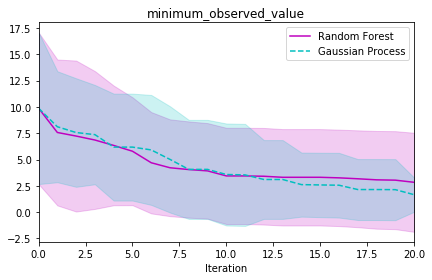

In [8]:
from emukit.benchmarking.loop_benchmarking.benchmark_plot import BenchmarkPlot
colours = ['m', 'c']
line_styles = ['-', '--']

metrics_to_plot = ['minimum_observed_value']
plots = BenchmarkPlot(benchmark_results, loop_colours=colours, loop_line_styles=line_styles, 
                      metrics_to_plot=metrics_to_plot)
plots.make_plot()

# Plot results against time

Using the `TimeMetric` object above, the time taken to complete each iteration of the loops was recorded. Here we plot the minimum observed value against the time taken.

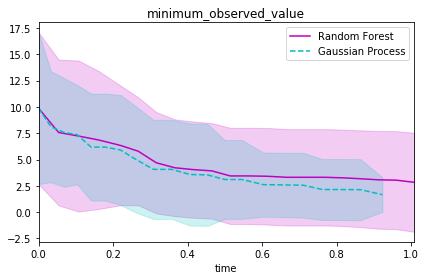

In [9]:
# Plot against time
plots = BenchmarkPlot(benchmark_results, loop_colours=colours, loop_line_styles=line_styles, 
                      x_axis_metric_name='time')
plots.make_plot()

# Conclusion

We have shown how to use Emukit to benchmark different methods against each other for Bayesian optimziation. This methodology can easily be expanded to more loops using different models and acquisition functions.